In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [109]:
df.shape

(301, 9)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [111]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [112]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [113]:
df.drop('Car_Name', axis=1, inplace=True)


In [114]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


<Axes: ylabel='Selling_Price'>

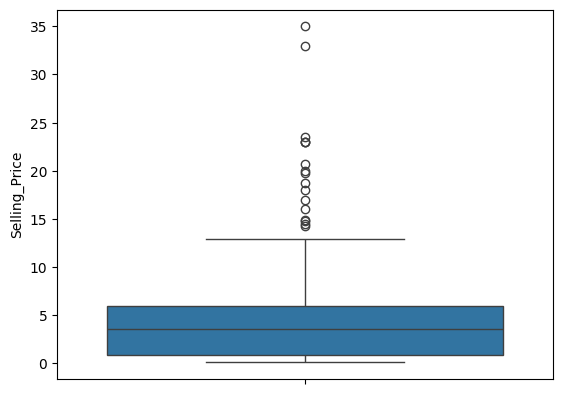

In [116]:
sns.boxplot(df['Selling_Price'])

In [117]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [119]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' to avoid dummy trap
])


In [120]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Year', 'Present_Price', 'Driven_kms',
                                  'Owner']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['Fuel_Type', 'Selling_type',
                                  'Transmission'])])

## Using Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_train = lr_pipeline.predict(X_train)
y_pred = lr_pipeline.predict(X_test)

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))
print(rmse)


2.9521138579812582
1.1709686059657074
1.7181716613834772


In [123]:
print(r2_score(y_train, y_pred_train))

0.8883342470084291


In [124]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(rmse)

3.4813498305118538
1.216374019333042
1.865837568094247


In [125]:
print(r2_score(y_test, y_pred))

0.8488707839193138


## Using Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_train = rf_pipeline.predict(X_train)
y_pred = rf_pipeline.predict(X_test)

In [127]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))
print(mean_absolute_error(y_train, y_pred_train))
print(rmse)

0.39643904445833333
0.2631987499999997
0.6296340559867559


In [128]:
print(r2_score(y_train, y_pred_train))


0.9850044183441587


In [129]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(rmse)

0.8390054309836057
0.6020245901639346
0.9159723964091963


In [130]:
print(r2_score(y_test, y_pred))


0.9635778536357699
